In [1]:
import sys
sys.path.append('..')

In [31]:
%matplotlib inline

import math as m
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [34]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [23]:
folder = r'C:\SPRUP_data_Jenda\2020_09_25_Jenda_prism_grating\20_10_16_L3/'.replace('\\', '/')

file = 'raw_02_'
core = []

for i in [1, 2]:
    c = Core(folder, file+str(i))
    c.k = 10
    core.append(c)


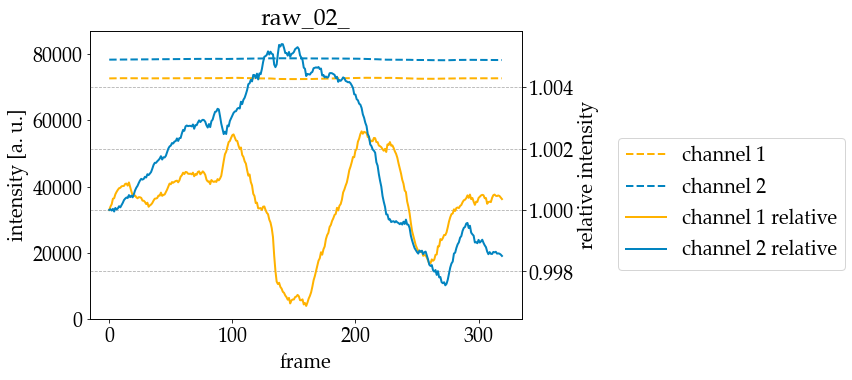

In [40]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')

axes_rel = axes.twinx()
axes_rel.grid(linestyle='--')
axes_rel.set_ylabel('relative intensity')

for i, c in enumerate(core):
    intensity = np.array([c.intensity(i) for i in range(len(c))])
    channel = 'channel {}'.format(c.file[-1])
    axes.plot(np.arange(0, len(c)),intensity, linewidth=2, label = channel, ls='--', color = COLORS[i])
    axes_rel.plot(np.arange(0, len(c)), intensity / intensity[0], linewidth=2, label = channel + ' relative', color = COLORS[i])
    
axes.set_ylim([0,axes.get_ylim()[1]*1.1])

lgd = fig.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

fig.savefig('images/intensity_fluctiations_SLED.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    
